In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from Pipeline.Scoring import SequenceIdentity, SequenceSimilarity

In [6]:
def calculateMetrics(row):
    if row['Identified'] != '-':
        similarity = SequenceSimilarity.SequenceSimilarity()
        identity = SequenceIdentity.SequenceIdentity()
        return [row['Scan number'], row['Sequence_maxQ'], row['Sequence_peptidePool'],
                similarity.getScore(row['Sequence_maxQ'], row['Sequence_peptidePool']),
                identity.getScore(row['Sequence_maxQ'], row['Sequence_peptidePool'])]

MaxQuant total: 50154
MaxQuant identified: 33910
peptide_pool size: 752
joined_df size: 50154
output size (without None): 33910
boxplot for: Pool_49/Thermo_SRM_Pool_49_01_01_3xHCD-1h-R2-tryptic


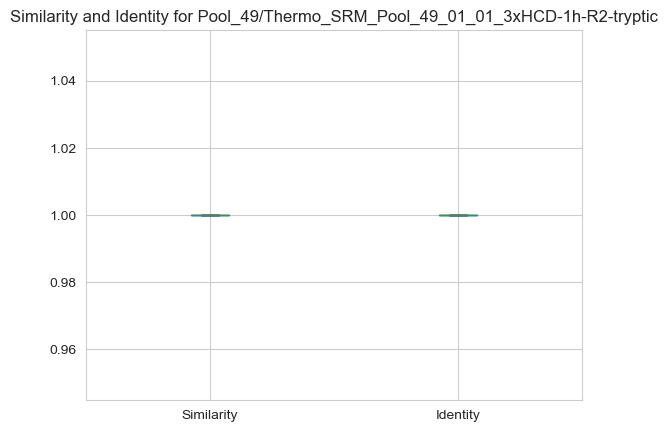

MaxQuant total: 49044
MaxQuant identified: 31605
peptide_pool size: 717
joined_df size: 49044
output size (without None): 31605
boxplot for: Pool_52/Thermo_SRM_Pool_52_01_01_3xHCD-1h-R2-tryptic


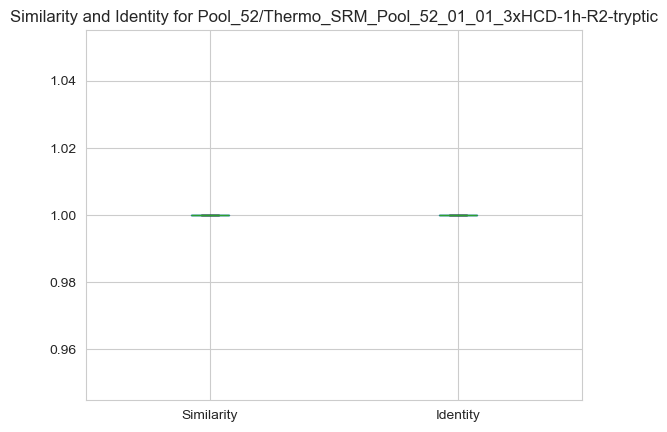

MaxQuant total: 49461
MaxQuant identified: 31502
peptide_pool size: 707
joined_df size: 49461
output size (without None): 31502
boxplot for: Pool_60/Thermo_SRM_Pool_60_01_01_3xHCD-1h-R2-tryptic


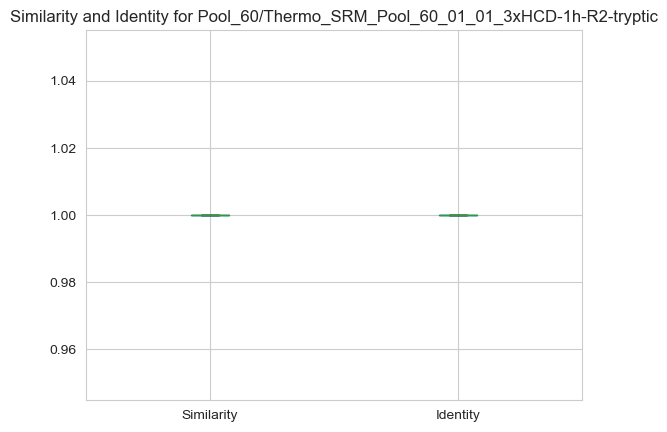

In [11]:
pools = [
    'Pool_49/Thermo_SRM_Pool_49_01_01_3xHCD-1h-R2-tryptic', 'Pool_52/Thermo_SRM_Pool_52_01_01_3xHCD-1h-R2-tryptic',
    'Pool_60/Thermo_SRM_Pool_60_01_01_3xHCD-1h-R2-tryptic']

for p in pools:
    # read sequence per scan and complete peptide pool
    maxQ_df = pd.read_csv(f'../../Data/Datasets/{p}/msmsScans.txt',
                          sep='\t')

    print("MaxQuant total:", maxQ_df.shape[0])
    print("MaxQuant identified:", maxQ_df[maxQ_df['Identified'] == '+'].shape[0])
    peptidePool_df = pd.read_csv(f'../../Data/Datasets/{p}/peptides.txt', sep='\t')
    # reduce dfs to necessary colmns
    maxQ_df = maxQ_df[['Scan number', 'Identified', 'Sequence']]
    peptidePool_df = peptidePool_df[['Sequence']]
    print("peptide_pool size:", peptidePool_df.shape[0])

    peptidePool_df = pd.DataFrame({'Key': peptidePool_df['Sequence'], 'Sequence': peptidePool_df['Sequence']})

    # join dfs
    joined_df = maxQ_df.merge(peptidePool_df, left_on='Sequence', right_on='Key', how='left',
                              suffixes=('_maxQ', '_peptidePool'))

    print("joined_df size:", joined_df.shape[0])
    # calculate identity and similarity for each row
    output = joined_df.apply(lambda x: calculateMetrics(x), axis=1)

    # filter out none identified scans
    output = filter(lambda x: x is not None, output)
    output = pd.DataFrame(list(output),
                          columns=['Scan number', 'Sequence_maxQ', 'Sequence_peptidePool', 'Similarity', 'Identity'])
    print("output size (without None):", output.shape[0])
    # reduce to target values and display box plots
    print("boxplot for:", p)
    similarity_identity = output[['Similarity', 'Identity']]
    plt.figure()
    similarity_identity.boxplot()
    plt.title("Similarity and Identity for " + p)
    plt.show()

